<a href="https://colab.research.google.com/github/Akash35678/Person-Identification-using-transfer-learning/blob/main/Vanilla_Ppl_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
from zipfile import ZipFile
file_name = '/content/processed_dataset1.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator()

# Load the data and generate batches
train_generator = datagen.flow_from_directory('/content/processed_dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Determine the number of classes
num_classes = train_generator.num_classes

Found 21 images belonging to 3 classes.


In [ ]:
train_dataset=train.flow_from_directory('/content/processed_dataset/train',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')
validation_dataset=train.flow_from_directory('/content/processed_dataset/val',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

Found 21 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'abitha': 0, 'akash': 1, 'ritsika': 2}

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),


                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512,activation="relu"),

                                  tf.keras.layers.Dense(num_classes,activation='softmax')

                                  ])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
3/3 [==============================] - 4s 1s/step - loss: 16.3184 - accuracy: 0.2222 - val_loss: 1.2195 - val_accuracy: 0.3333
Epoch 2/15
3/3 [==============================] - 2s 731ms/step - loss: 1.2037 - accuracy: 0.2222 - val_loss: 1.0857 - val_accuracy: 0.6667
Epoch 3/15
3/3 [==============================] - 2s 722ms/step - loss: 1.1186 - accuracy: 0.4444 - val_loss: 1.1568 - val_accuracy: 0.3333
Epoch 4/15
3/3 [==============================] - 2s 691ms/step - loss: 1.4642 - accuracy: 0.3333 - val_loss: 1.1719 - val_accuracy: 0.3333
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 1.0154 - accuracy: 0.7778 - val_loss: 1.1303 - val_accuracy: 0.3333
Epoch 6/15
3/3 [==============================] - 2s 658ms/step - loss: 0.8651 - accuracy: 0.5556 - val_loss: 1.1627 - val_accuracy: 0.3333
Epoch 7/15
3/3 [==============================] - 2s 731ms/step - loss: 0.9584 - accuracy: 0.6667 - val_loss: 1.0856 - val_accuracy: 0.5000
Epoch 8/15
3/3 [=========

In [ ]:
accuracy = model_fit.history['accuracy']
print("Accuracy:", accuracy)

Accuracy: [0.2222222238779068, 0.2222222238779068, 0.4444444477558136, 0.3333333432674408, 0.7777777910232544, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.7777777910232544, 0.5555555820465088, 0.7777777910232544, 1.0, 0.8888888955116272, 1.0, 0.7777777910232544]


In [ ]:
model.save('model.h5')

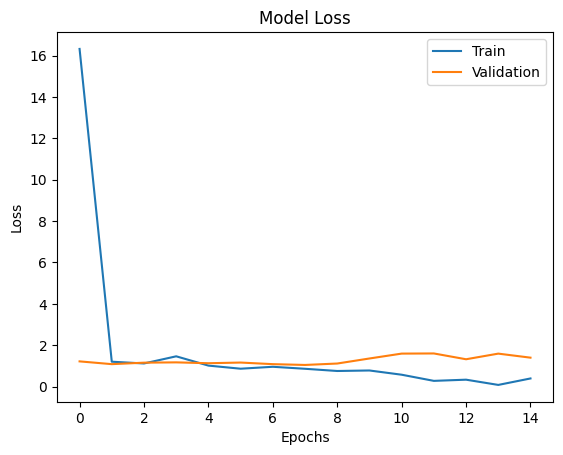

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
train_generator = datagen.flow_from_directory('/content/processed_dataset/train', target_size=(200, 200), batch_size=32, class_mode='categorical')

train_dataset = train.flow_from_directory('/content/processed_dataset/train',
                                        target_size=(200, 200),
                                        batch_size=3,
                                        class_mode='categorical')

validation_dataset = train.flow_from_directory('/content/processed_dataset/val',
                                        target_size=(200, 200),
                                        batch_size=3,
                                        class_mode='categorical')
# Define the test folder path
test_folder = '/content/processed_dataset/test'

# Get the list of subfolders (class labels)
class_labels = sorted(os.listdir(test_folder))

# Load the trained model
model = tf.keras.models.load_model('/content/model.h5')

# Initialize lists to store predicted labels and true labels
predicted_labels = []
true_labels = []

# Iterate over the subfolders in the test folder
for label in class_labels:
    folder_path = os.path.join(test_folder, label)

    # Iterate over the images in each subfolder
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        # Preprocess the image (if required)
        # ...

        # Load and predict the label of the image using the model
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        prediction = model.predict(img_array)
        predicted_label = class_labels[np.argmax(prediction)]

        # Append the predicted and true labels to the lists
        predicted_labels.append(predicted_label)
        true_labels.append(label)

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Found 21 images belonging to 3 classes.
Found 21 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


ValueError: ignored

In [ ]:
!pip install tflite


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
converter =tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

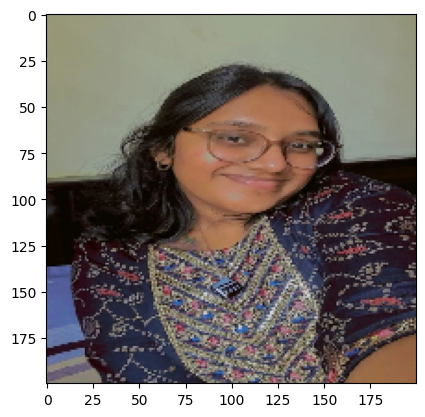

1/1 [==============================] - 0s 84ms/step
Predicted class: ritsika


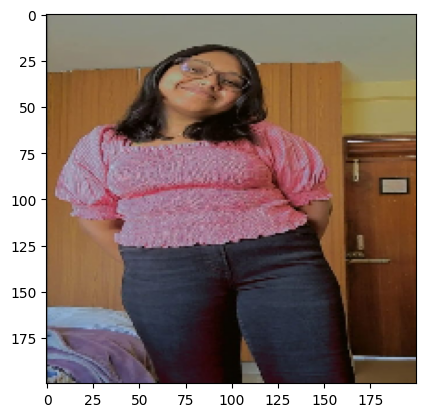

1/1 [==============================] - 0s 79ms/step
Predicted class: ritsika


In [ ]:
dir_path = '/content/processed_dataset1/processed_dataset/test/abitha/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '/' + i, target_size=(200, 200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0  # Normalize the image

  prediction = model.predict(x)
  predicted_class_index = np.argmax(prediction)

  class_names = list(train_dataset.class_indices.keys())
  predicted_class = class_names[predicted_class_index]

  print("Predicted class:", predicted_class)


In [ ]:
image_path = '/content/WhatsApp Image 2023-06-05 at 5.39.43 PM.jpeg'  # Replace with the path to your image

img = image.load_img(image_path, target_size=(200, 200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model.predict(x)
predicted_class_index = np.argmax(prediction)

class_names = list(train_dataset.class_indices.keys())
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)

FileNotFoundError: ignored

RESNET50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Load the ResNet50 model (excluding the top layer)
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Set all layers in the ResNet50 model as non-trainable
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model based on ResNet50
model = Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Train the model
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=10,
                      validation_data=validation_dataset)

94765736/94765736 [==============================] - 0s 0us/step


Epoch 1/10
3/3 [==============================] - 8s 2s/step - loss: 5.5849 - accuracy: 0.3333 - val_loss: 1.6775 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 4s 2s/step - loss: 1.7580 - accuracy: 0.0000e+00 - val_loss: 1.1573 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.1735 - accuracy: 0.5556 - val_loss: 1.2574 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.5424 - accuracy: 0.2222 - val_loss: 1.1356 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 1.1193 - accuracy: 0.3333 - val_loss: 1.2368 - val_accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 4s 2s/step - loss: 1.1491 - accuracy: 0.3333 - val_loss: 1.1360 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 1.1694 - accuracy: 0.4444 - val_loss: 1.2525 - val_accuracy: 0.3333
Epoch 8/10
3/3 [=====================

In [ ]:
pip install deepface


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=f7d516d03c54974fb54929fa4c58fc3baef72aa4d57516838b9bd0f076c40eac
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
from tensorflow.keras.layers import Input
from deepface import DeepFace

# Create the base model using ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Set all layers in the base model as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Create the DeepFace model using the base ResNet50 model
input_tensor = Input(shape=(200, 200, 3))
resnet_output = base_model(input_tensor)
deepface_model = DeepFace.build_model(resnet_output)

# Compile the model
deepface_model.compile(loss='categorical_crossentropy',
                       optimizer=RMSprop(lr=0.001),
                       metrics=['accuracy'])

# Train the model
deepface_model_fit = deepface_model.fit(train_dataset,
                                        steps_per_epoch=3,
                                        epochs=10,
                                        validation_data=validation_dataset)

TypeError: ignored

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(include_top=False, input_shape=(200, 200, 3), weights='imagenet')
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

model.fit(train_dataset,
          steps_per_epoch=3,
          epochs=10,
          validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 4s 624ms/step - loss: 6.7282 - accuracy: 0.3333 - val_loss: 1.2421 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 195ms/step - loss: 1.8341 - accuracy: 0.3333 - val_loss: 1.7953 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 1s 210ms/step - loss: 0.2327 - accuracy: 0.8889 - val_loss: 0.7152 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 1s 264ms/step - loss: 0.5132 - accuracy: 0.7778 - val_loss: 0.9106 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 476ms/step - loss: 0.0800 - accuracy: 1.0000 - val_loss: 1.3763 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 1s 239ms/step - loss: 0.1458 - accuracy: 0.8889 - val_loss: 0.6071 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 1s 206ms/step - loss: 0.2582 - accuracy: 0.8889 - val_loss: 2.0154 - val_accuracy: 0.3333
Epoch 8/10
3/3 [====

In [ ]:
model.save("/content/model.h5")


In [ ]:
class_names = ['abitha', 'akash', 'ritsika']  # Replace with the actual class names in your dataset


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Preprocess the image
img_path = '/content/WhatsApp Image 2023-06-05 at 5.39.43 PM (1).jpeg'  # Replace with the path to your own image
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Load the trained model
model = tf.keras.models.load_model('/content/model.h5')  # Replace with the path to your saved model

# Perform inference
predictions = model.predict(x)

# Interpret the results
class_index = np.argmax(predictions[0])
class_label = class_names[class_index]  # Replace with your own class labels

print("Predicted class:", class_label)


1/1 [==============================] - 1s 581ms/step
Predicted class: abitha


Epoch 1/10
7/7 [==============================] - 3s 236ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.4689 - val_accuracy: 0.6667
Epoch 2/10
7/7 [==============================] - 1s 126ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4598 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4581 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 1s 123ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4432 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 1s 201ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 0.6667
Epoch 6/10
7/7 [==============================] - 1s 147ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4249 - val_accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 1s 123ms/step - loss: 9.5193e-04 - accuracy: 1.0000 - val_loss: 0.4158 - val_accuracy: 0.6667
Epoch 8/10
7/7 [

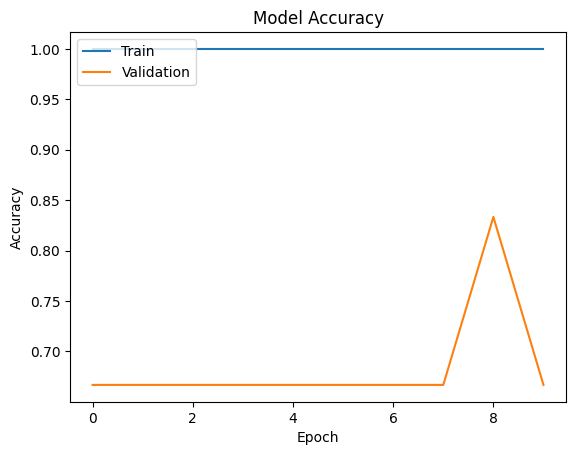

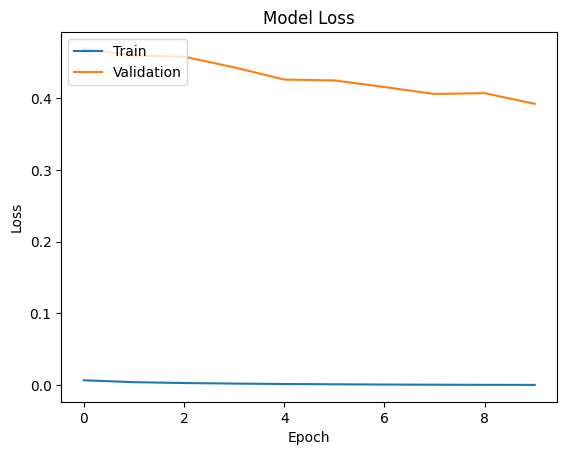

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=10,
                    validation_data=validation_dataset,
                    validation_steps=len(validation_dataset))



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

vgg16


58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 23.8391 - accuracy: 0.4444 - val_loss: 2.6635 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 5s 2s/step - loss: 2.6140 - accuracy: 0.5556 - val_loss: 4.1065 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 3.5192 - accuracy: 0.4444 - val_loss: 2.8928 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.9719 - accuracy: 0.6667 - val_loss: 3.9473 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 0.7229 - accuracy: 0.8889 - val_loss: 5.5900 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 0.3128 - accuracy: 0.8889 - val_loss: 3.4289 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 2.1648 - val_accuracy: 0.5000
Epoch 8/20
3/3 [========================

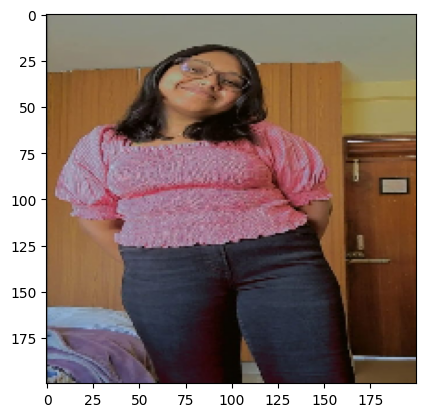

1/1 [==============================] - 0s 407ms/step
Predicted class: abitha


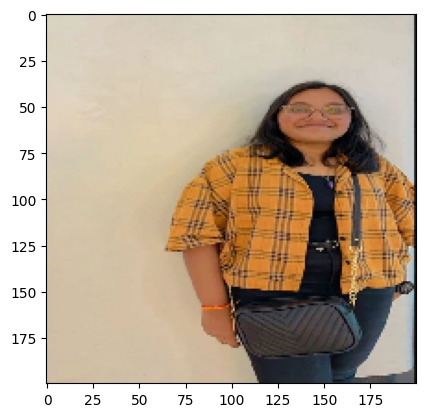

1/1 [==============================] - 0s 300ms/step
Predicted class: abitha


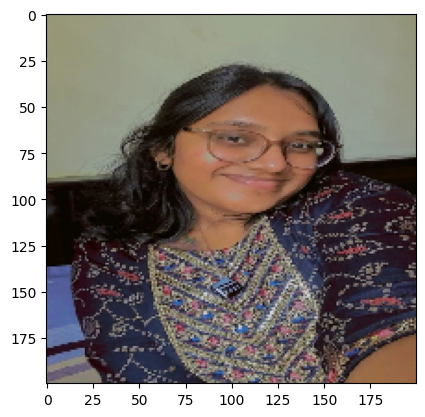

1/1 [==============================] - 0s 306ms/step
Predicted class: abitha


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import os

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Create the model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset,
          steps_per_epoch=3,
          epochs=20,
          validation_data=validation_dataset)

# Test with your own images
dir_path = '/content/processed_dataset/test/abitha'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '/' + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    prediction = model.predict(x)
    predicted_class_index = np.argmax(prediction)

    class_names = list(train_dataset.class_indices.keys())
    predicted_class = class_names[predicted_class_index]

    print("Predicted class:", predicted_class)

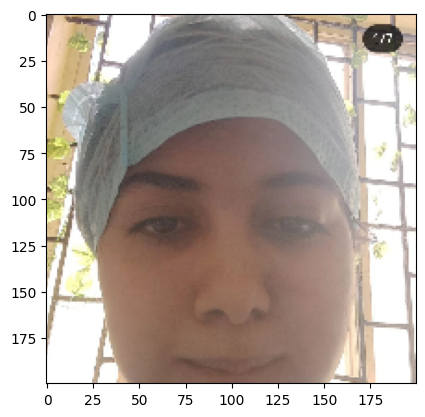

1/1 [==============================] - 0s 295ms/step
Predicted class: abitha


In [ ]:
img_path = '/content/WhatsApp Image 2023-06-05 at 5.39.43 PM (1).jpeg'  # Replace with the path to your own image
img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

# Perform inference
prediction = model.predict(x)
predicted_class_index = np.argmax(prediction)

class_names = list(train_dataset.class_indices.keys())
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)